                                          ****In Vehicle Coupon Recommendation****

This data checks whether a person will accept a coupon or not. This data was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether they will accept the coupon if they are the driver.

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import sys
from termcolor import cprint
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import plot_tree

                                                    ****Preprocessing*****

In [2]:
#loading the dataset
dataset=pd.read_csv('in-vehicle-coupon-recommendation.csv')
dataset

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


In [3]:
# checking the number of rows and columns
print('The number of rows and and columns')
print(dataset.shape)
#removing duplicates and checking the shape again
dataset = dataset.drop_duplicates()
print('The number of rows and and columns, after removing the duplicates')
print(dataset.shape)

The number of rows and and columns
(12684, 26)
The number of rows and and columns, after removing the duplicates
(12610, 26)


**74 rows were duplicate and we dropped them.**

*This dataset has 12684 rows and 26 columns.*

              ***************** **Explaining the columns in the dataset** *****************

1. destination: Specifying the destination they are going.
                No urgent place, Home, Work
2. passenger: Specifying the passengers in the car.
                Alone, Friend(s), Kid(s), Partner
3. weather: Sunny, Rainy, Snowy

4. temperature: 55, 80, 30 (Farenheit)

5. time: 2PM, 10AM, 6PM, 7AM, 10PM

6. coupon: Restaurant(<20), Coffee House, Carry out & Take away, Bar, Restaurant(20-$50)

7. expiration: 1d, 2h (the coupon expires in 1 day or in 2 hours)

8. gender: Female, Male

9. age: 21, 46, 26, 31, 41, 50plus, 36, below21

10. maritalStatus: Unmarried partner, Single, Married partner, Divorced, Widowed

11. has_child: 1,0

12. education: Specifying the education they have

13. occupation: Unemployed or specifying the occupation

14. Income: Specifying the range of income

15. Car: Specifying the name of the car

16. Bar: denoting the number of visit to the bar each month

17. CoffeeHouse: denoting the number of visit to the coffee house each month

18. CarryAway: specifying how many times you are getting take away food

19. RestaurantLessThan20: how many times do you go to a restaurant with an average expense per person of less than $20 every month?

20. Restaurant20To50: how many times do you go to a restaurant with average expense per person of  20− 50 every month?
    
21. toCoupon_GEQ5min: 0, 1, i.e. driving distance to the restaurant /bar is greater than 5 minutes

22. toCoupon_GEQ15min: 0, 1, i.e. driving distance to the restaurant /bar is greater than 15 minutes

23. toCoupon_GEQ25min: 0, 1, i.e. i.e. driving distance to the restaurant /bar is greater than 25 minutes

24. direction_same: 0,1, i.e. whether the restaurant/bar is in the same direction as your current destination

25. direction_opp: whether the restaurant/bar is in the opposite direction as your current destination

26. Y:1, 0 i.e. whether the coupon is accepted

In [4]:
#Displaying first 5 data in the dataframe
dataset.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [5]:
#Displaying the last 5 data from the dataset 
dataset.tail()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0
12683,Work,Alone,Sunny,80,7AM,Restaurant(20-50),2h,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0


In [6]:
# Displaying the summary of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12610 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12610 non-null  object
 1   passanger             12610 non-null  object
 2   weather               12610 non-null  object
 3   temperature           12610 non-null  int64 
 4   time                  12610 non-null  object
 5   coupon                12610 non-null  object
 6   expiration            12610 non-null  object
 7   gender                12610 non-null  object
 8   age                   12610 non-null  object
 9   maritalStatus         12610 non-null  object
 10  has_children          12610 non-null  int64 
 11  education             12610 non-null  object
 12  occupation            12610 non-null  object
 13  income                12610 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12503 non-null  obj

In [7]:
#Fetching the number of elements in the dataframe
dataset.size

327860

**The dataset has 327860 elements in total**

In [8]:
#finding statistical values
dataset.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12610.000000,12610.000000,12610.0,12610.000000,12610.000000,12610.000000,12610.000000,12610.000000
mean,63.267248,0.414512,1.0,0.559794,0.116019,0.215543,0.784457,0.567565
std,19.153386,0.492657,0.0,0.496432,0.320260,0.411215,0.411215,0.495434
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
Y_counts = dataset.groupby('Y').Y.count()
print('Accepted coupon:',Y_counts[1],round(Y_counts[1]/dataset.shape[0]*100,3),'%')
print('Rejected coupon:',Y_counts[0],round(Y_counts[0]/dataset.shape[0]*100,3),'%')

Accepted coupon: 7157 56.757 %
Rejected coupon: 5453 43.243 %


  **This dataset is partially balanced. The acceptance class labels are approximately 57% and reject class labels are approx 43%.**


In [10]:
# Checking for any null values in the dataset
dataset.isnull().any()

destination             False
passanger               False
weather                 False
temperature             False
time                    False
coupon                  False
expiration              False
gender                  False
age                     False
maritalStatus           False
has_children            False
education               False
occupation              False
income                  False
car                      True
Bar                      True
CoffeeHouse              True
CarryAway                True
RestaurantLessThan20     True
Restaurant20To50         True
toCoupon_GEQ5min        False
toCoupon_GEQ15min       False
toCoupon_GEQ25min       False
direction_same          False
direction_opp           False
Y                       False
dtype: bool

car                      True
Bar                      True
CoffeeHouse              True
CarryAway                True
RestaurantLessThan20     True
Restaurant20To50         True

All these fields returned true for null value check, that indicates these fields are having null values.

In [11]:
#Checking for the number of null values
dataset.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12502
Bar                       107
CoffeeHouse               217
CarryAway                 150
RestaurantLessThan20      129
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

**Handling the null values**


**1. The car field is having 12502 null values. So we will drop the column.**

In [12]:
#dropping the field 'car'
new_dataset=dataset.drop(columns=['car'])
# checking after dropping cabin
new_dataset.shape

(12610, 25)

        **Now we have 25 columns in the dataset.**

**2. The Bar field with 107 null values**

In [13]:
# Bar indicates, how many times a person go the bar each month. So for these null values we will replace 
# them with the mode value

#Finding mode value of the Bar field
mode_Bar=new_dataset['Bar'].mode()[0]

#replace all the NaN values in the 'Bar' field with the mode Bar value 
new_dataset['Bar']=new_dataset['Bar'].replace(to_replace=np.nan,value=mode_Bar)


In [14]:
#checking the null values in Bar field after replacing
print(new_dataset['Bar'].isnull().sum())

0


        **We got 0, that means all the null values got replaced.**

**3. The CoffeeHouse field with 217 null values**

In [15]:
# CoffeeHouse indicates, how many times a person go the coffeehouse each month. So for these null values we will replace 
# them with the mode value

#Finding mode value of the CoffeeHouse field
mode_CoffeeHouse=new_dataset['CoffeeHouse'].mode()[0]

#replace all the NaN values in the 'CoffeeHouse' field with the mode_CoffeeHouse value
new_dataset['CoffeeHouse']=new_dataset['CoffeeHouse'].replace(to_replace=np.nan,value=mode_CoffeeHouse)

In [16]:
#checking the null values in CoffeeHouse field after replacing
print(new_dataset['CoffeeHouse'].isnull().sum())

0


        **We got 0, that means all the null values got replaced.**

**4. The CarryAway field is having 150 null values**

In [17]:
#replace all the NaN values in the 'CarryAway' field with the mode value of CarryAway field
new_dataset['CarryAway']=new_dataset['CarryAway'].replace(to_replace=np.nan,value=new_dataset['CarryAway'].mode()[0])

In [18]:
#checking the null values in CarryAway field after replacing
print(new_dataset['CarryAway'].isnull().sum())

0


**5. The RestaurantLessThan20 field is having 129 null values**

In [19]:
#replace all the NaN values in the 'RestaurantLessThan20' field with the mode value of RestaurantLessThan20 field
new_dataset['RestaurantLessThan20']=new_dataset['RestaurantLessThan20'].replace(to_replace=np.nan,value=new_dataset['RestaurantLessThan20'].mode()[0])

In [20]:
#checking the null values in RestaurantLessThan20 field after replacing
print(new_dataset['RestaurantLessThan20'].isnull().sum())

0


**6. The Restaurant20To50 field is having 189 null values**

In [21]:
#replace all the NaN values in the 'Restaurant20To50' field with the mode value of Restaurant20To50 field
new_dataset['Restaurant20To50']=new_dataset['Restaurant20To50'].replace(to_replace=np.nan,value=new_dataset['Restaurant20To50'].mode()[0])

In [22]:
#checking the null values in Restaurant20To50 field after replacing
print(new_dataset['Restaurant20To50'].isnull().sum())

0


In [23]:
#Checking for the number of null values for verifying
new_dataset.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

**By analysing the data, we can find out that the Feature 'direction_same' is perfectly correlated with 'direction_opp', both features are having boolean values. When direction_same is 1, the direction_opp value is 0 and it is obvious. So we can drop the direction_opp column**

In [24]:
new_dataset.drop(['direction_opp'], axis=1, inplace=True)

In [25]:
new_dataset.shape

(12610, 24)

**Now we have 24 columns**

                                        *******************Visualization*******************

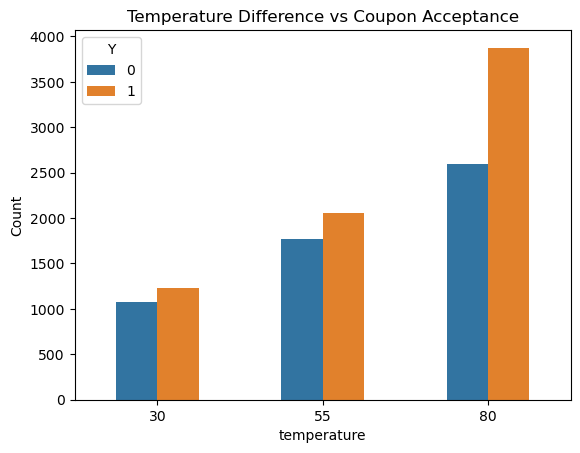

In [26]:
#checking the effect of temperature on coupon acceptance

sns.countplot(data=new_dataset,x='temperature',hue='Y',width=0.5)
plt.title("Temperature Difference vs Coupon Acceptance")
plt.xlabel('temperature')
plt.ylabel('Count')
plt.show()

**Observation**: As we can see we have more coupon acceptance when temperature is on the higher side.

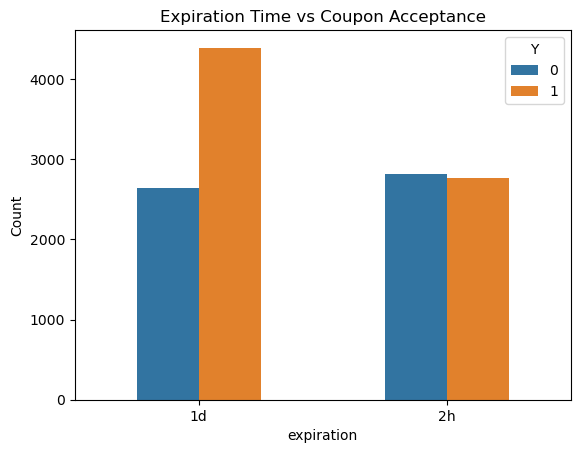

In [27]:
#checking the effect of coupon expiration on coupon acceptance

sns.countplot(data=new_dataset,x='expiration',hue='Y',width=0.5)
plt.title("Expiration Time vs Coupon Acceptance")
plt.xlabel('expiration')
plt.ylabel('Count')
plt.show()

**Observation**: When the expiry value of the coupon is higher ie 24 hrs there is more number of coupon acceptance.

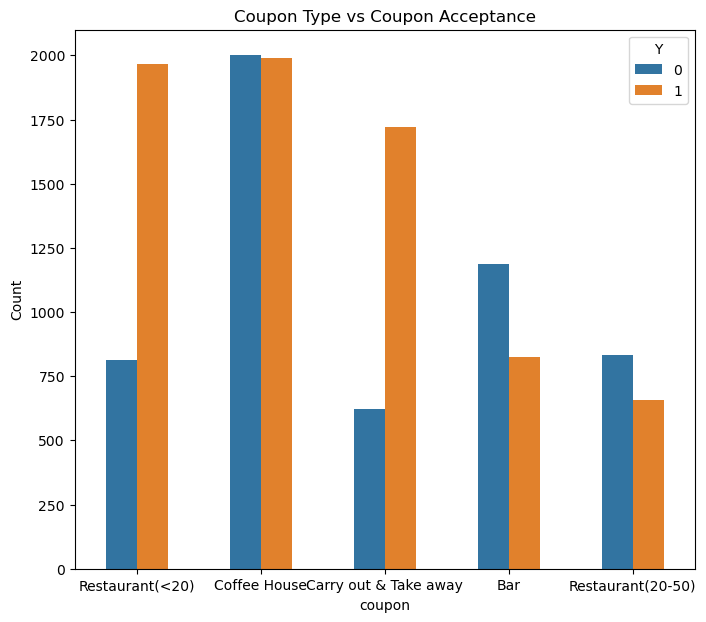

In [28]:
#checking the effect of coupon expiration on coupon acceptance

plt.figure(figsize=(8,7))
sns.countplot(data=new_dataset,x='coupon',hue='Y',width=0.5)
plt.title("Coupon Type vs Coupon Acceptance")
plt.xlabel('coupon')
plt.ylabel('Count')
plt.show()

**Observation**: From the above plot, Cheap restaurants and carry out/ takeaway have the highest coupon acceptance rates. For coffeehouse we cannot decide and for bars and Expensive restaurants, people mostly reject their coupons.

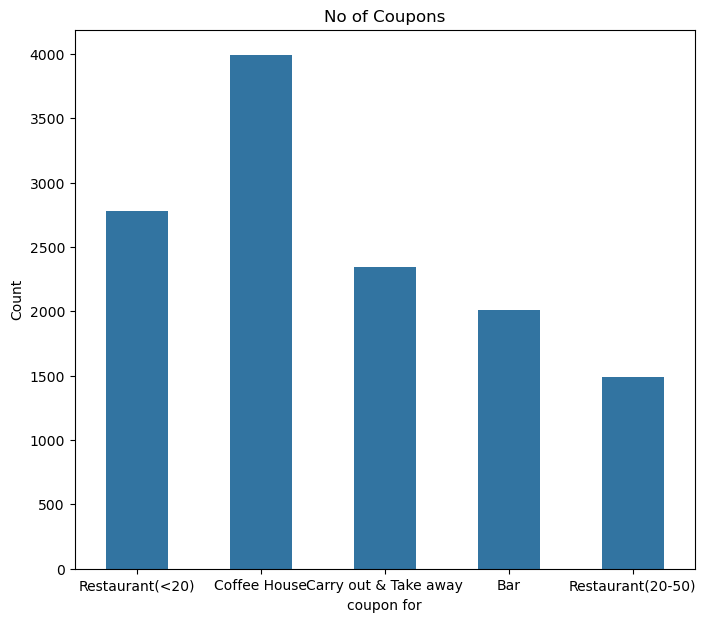

In [29]:
#checking the effect of coupon expiration on coupon acceptance

plt.figure(figsize=(8,7))
sns.countplot(data=new_dataset,x='coupon',width=0.5)
plt.title("No of Coupons")
plt.xlabel('coupon for')
plt.ylabel('Count')
plt.show()

**Observation**: Most coupons were offered for coffee house and least were for the expensive restaurants.

**Checking outliers**

A Box Plot is a visualization design that uses box shapes to display insights into data. So we will draw the boxplot 
for the main numerical values in our dataset, to check for any spread in the values.


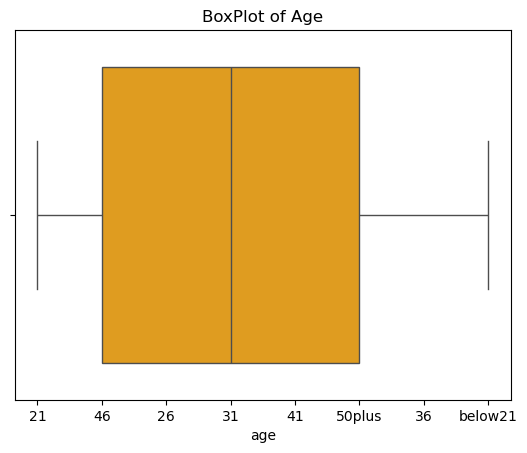

In [30]:
sns.boxplot(data=new_dataset,x='age',color='orange')
plt.title('BoxPlot of Age')
plt.show()


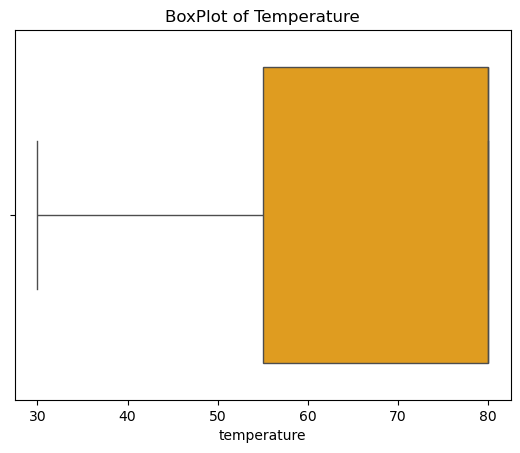

In [31]:
sns.boxplot(data=new_dataset,x='temperature',color='orange')
plt.title('BoxPlot of Temperature')
plt.show()

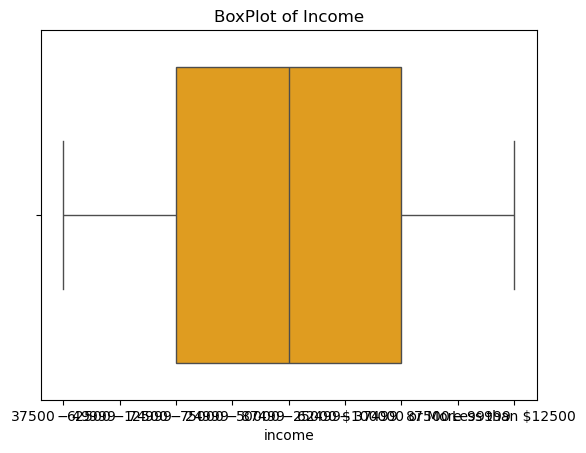

In [32]:
sns.boxplot(data=new_dataset,x='income',color='orange')
plt.title('BoxPlot of Income')
plt.show()

**Observation**:So here we checked the outliers for the fields, **age**,**temperature** and **income**.
None of the boxplots have any outliers. That means the data is consistent and it is reliable. The mean, median and mode are 
more representative of the data. The standard deviation and variance will be lower which indicates a less spread in the data.

********************************************MODEL BUILDING********************************************

In [33]:
#print(y)

In [34]:
transformnumbers = LabelEncoder()
new_dataset['age'] = transformnumbers.fit_transform(new_dataset['age'])
new_dataset['destination'] = transformnumbers.fit_transform(new_dataset['destination'])
new_dataset['passanger'] = transformnumbers.fit_transform(new_dataset['passanger'])
new_dataset['weather'] = transformnumbers.fit_transform(new_dataset['weather'])
new_dataset['time'] = transformnumbers.fit_transform(new_dataset['time'])
new_dataset['coupon'] = transformnumbers.fit_transform(new_dataset['coupon'])
new_dataset['expiration'] = transformnumbers.fit_transform(new_dataset['expiration'])
new_dataset['gender'] = transformnumbers.fit_transform(new_dataset['gender'])
new_dataset['maritalStatus'] = transformnumbers.fit_transform(new_dataset['maritalStatus'])
new_dataset['education'] = transformnumbers.fit_transform(new_dataset['education'])
new_dataset['occupation'] = transformnumbers.fit_transform(new_dataset['occupation'])
new_dataset['Bar'] = transformnumbers.fit_transform(new_dataset['Bar'])
new_dataset['CoffeeHouse'] = transformnumbers.fit_transform(new_dataset['CoffeeHouse'])
# new_dataset['car'] = transformnumbers.fit_transform(new_dataset['car'])
new_dataset['CarryAway'] = transformnumbers.fit_transform(new_dataset['CarryAway'])
new_dataset['income'] = transformnumbers.fit_transform(new_dataset['income'])
new_dataset['Restaurant20To50'] = transformnumbers.fit_transform(new_dataset['Restaurant20To50'])
new_dataset['RestaurantLessThan20'] = transformnumbers.fit_transform(new_dataset['RestaurantLessThan20'])
new_dataset.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,Y
0,1,0,2,55,2,4,0,0,0,3,...,4,4,0,1,0,1,0,0,0,1
1,1,1,2,80,0,2,1,0,0,3,...,4,4,0,1,0,1,0,0,0,0
2,1,1,2,80,0,1,1,0,0,3,...,4,4,0,1,0,1,1,0,0,1
3,1,1,2,80,2,2,1,0,0,3,...,4,4,0,1,0,1,1,0,0,0
4,1,1,2,80,2,2,0,0,0,3,...,4,4,0,1,0,1,1,0,0,0


In [35]:
#Finding x and y ie the features and target variable
x = new_dataset.drop(columns = 'Y')
y = new_dataset.Y
print(x)


       destination  passanger  weather  temperature  time  coupon  expiration  \
0                1          0        2           55     2       4           0   
1                1          1        2           80     0       2           1   
2                1          1        2           80     0       1           1   
3                1          1        2           80     2       2           1   
4                1          1        2           80     2       2           0   
...            ...        ...      ...          ...   ...     ...         ...   
12679            0          3        0           55     3       1           0   
12680            2          0        0           55     4       1           0   
12681            2          0        1           30     4       2           0   
12682            2          0        1           30     4       0           0   
12683            2          0        2           80     4       3           1   

       gender  age  marital

In [36]:
#Splitting train and test dataset
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.20)


In [37]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [38]:
#Define Models

models={
    'Logistic Regression':LogisticRegression(),
    'Decision Tree Classifier':DecisionTreeClassifier(),
    'Random Forest Classifier':RandomForestClassifier(n_estimators=100),
    'Support Vector Classifier':SVC(kernel='linear'),
    'KNN':KNeighborsClassifier(n_neighbors=5)
}

In [39]:
# Evaluating the model

cprint("\n-----------------Checking Accuracy and Confusion Matrix for different models-----------------\n",'red',attrs=['bold'])
result={}
for name, model in models.items():
    model.fit(X_train,Y_train)
    y_pred=model.predict(X_test)
    accuracy=accuracy_score(Y_test,y_pred)
    result[name]=accuracy
    #print(f"{name} Accuracy:{accuracy:.2f}")
    cprint(f"\n{name} Accuracy:{accuracy:.2f}",'green',attrs=['bold'])   
    print(f"Confusion Matrix for {name}:")
    cprint(confusion_matrix(Y_test,y_pred),'blue',attrs=['bold'])


-----------------Checking Accuracy and Confusion Matrix for different models-----------------


Logistic Regression Accuracy:0.62
Confusion Matrix for Logistic Regression:
[[ 480  645]
 [ 320 1077]]

Decision Tree Classifier Accuracy:0.67
Confusion Matrix for Decision Tree Classifier:
[[720 405]
 [429 968]]

Random Forest Classifier Accuracy:0.76
Confusion Matrix for Random Forest Classifier:
[[ 766  359]
 [ 258 1139]]

Support Vector Classifier Accuracy:0.62
Confusion Matrix for Support Vector Classifier:
[[ 474  651]
 [ 305 1092]]

KNN Accuracy:0.66
Confusion Matrix for KNN:
[[ 610  515]
 [ 352 1045]]


**-------------------------------RANDOM FOREST-------------------------------**-Model Building

In [40]:
#Finding xr and yr ie the features and target variable
xr = new_dataset.drop(columns = 'Y')
yr = new_dataset.Y

In [41]:
#Splitting train and test dataset
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(xr, yr, test_size=0.20)

In [42]:
sc=StandardScaler()
X_train1=sc.fit_transform(X_train1)
X_test1=sc.transform(X_test1)

In [43]:
# working of ensemble learner, random forest
classifier=RandomForestClassifier(n_estimators=100, criterion='gini',max_depth=7)
classifier.fit(X_train1,Y_train1)

RandomForestClassifier(max_depth=7)

In [44]:
y_pred1=classifier.predict(X_test1)
y_pred1

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

**-------------------------------Performance Evaluation of Random Forest Model-------------------------------**

In [45]:
acc=accuracy_score(Y_test1,y_pred1)
cprint(f"\n Accuracy Score:\t{acc:.2f}",'green',attrs=['bold'])   
cm=confusion_matrix(Y_test1,y_pred1)
cprint(f"\n Confusion Matrix:\n{cm:}",'blue',attrs=['bold'])   




 Accuracy Score:	0.72

 Confusion Matrix:
[[ 539  533]
 [ 174 1276]]


<function matplotlib.pyplot.show(close=None, block=None)>

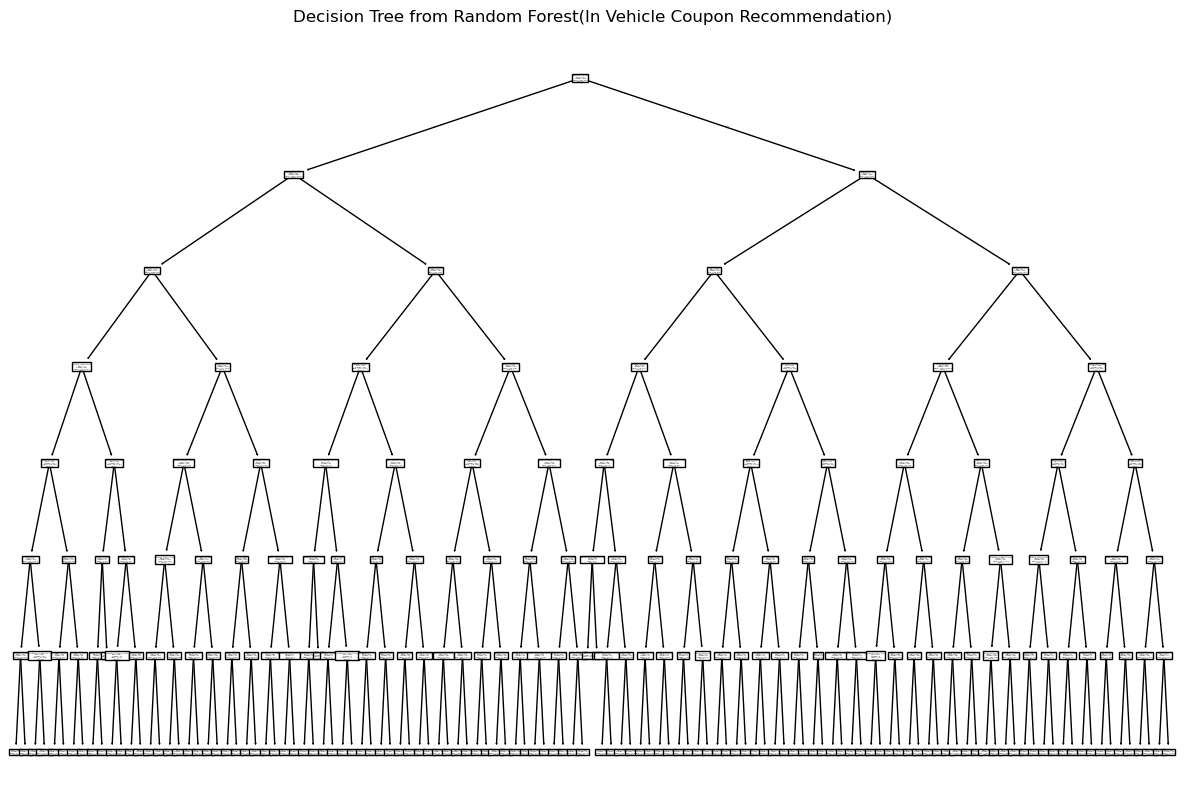

In [46]:


#select one tree from the forest
tree=classifier.estimators_[0]
#plot decision tree
plt.figure(figsize=(15,10))
plot_tree(tree,feature_names=['destination','passanger','weather','temperature','time','coupon','expiration','gender',
                             'age','maritalStatus','has_child','education','occupation','income','Bar','CoffeeHouse','CarryAway',
                             'RestaurantLessThan20','Restaurant20To50','toCoupon_GEQ5min','toCoupon_GEQ15min','toCoupon_GEQ25min',
                             'direction_same'],class_names=['0','1'])
plt.title("Decision Tree from Random Forest(In Vehicle Coupon Recommendation)")
plt.show

**OBSERVATION AND CONCLUSION:** The random forest model is the best fitted one among the checked algorithms. The
model is giving the performance indices as:

Random Forest Classifier Accuracy:0.76
Confusion Matrix for Random Forest Classifier:
[[ 766  359]
 [ 258 1139]]

 So we checked for accuracy by creating the model, then also it is giving 72% accuracy. So random foest can be concluded as the best fit among these algorithms for In Vehicle Coupon recommendation.